In [457]:
## Importar librerias 

import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [458]:
## Cargamos los datos  

df = pd.read_excel('Datos_201901_202009.xlsx')
print(df.head())

   CAMPAÑA  GRUPO_1  GRUPO_2  GRUPO_3  GRUPO_4  GRUPO_5  GRUPO_6  GRUPO_7  \
0   201901     6492     6062     2961     1652     1190       89       31   
1   201902     4757     3618     2089      855      399       54       13   
2   201903     5047     3031     1018      309      157       63       12   
3   201904     6227     4586     2056      569      197       94       23   
4   201905     5738     4504     2710      525      114       54       21   

   GRUPO_8  GRUPO_9  GRUPO_10  PEDIDOS_TOTALES  
0      410       15        43            54113  
1       19        9        20            43091  
2        7        8        10            50112  
3       10        7        11            49522  
4        8       10         7            51854  


In [459]:
print(df.describe()) ## (!) campaña tomada como entero

             CAMPAÑA      GRUPO_1      GRUPO_2      GRUPO_3      GRUPO_4  \
count      27.000000    27.000000    27.000000    27.000000    27.000000   
mean   201941.333333  6423.407407  5044.185185  2922.037037   939.037037   
std        46.104397  1075.220666   998.678051  1069.612528   577.807360   
min    201901.000000  4328.000000  3031.000000  1018.000000   100.000000   
25%    201907.500000  5836.500000  4436.000000  2072.500000   533.500000   
50%    201914.000000  6502.000000  5200.000000  3112.000000   759.000000   
75%    202002.500000  7185.000000  5695.000000  3750.500000  1359.000000   
max    202009.000000  8783.000000  6990.000000  4894.000000  2013.000000   

           GRUPO_5      GRUPO_6     GRUPO_7     GRUPO_8     GRUPO_9  \
count    27.000000    27.000000   27.000000   27.000000   27.000000   
mean    416.074074   232.666667   33.814815   47.370370   35.444444   
std     412.075136   255.798148   31.527811   84.199008   87.200623   
min      37.000000    36.000000

In [460]:
df = df.astype({'CAMPAÑA': str})

In [461]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CAMPAÑA          27 non-null     object
 1   GRUPO_1          27 non-null     int64 
 2   GRUPO_2          27 non-null     int64 
 3   GRUPO_3          27 non-null     int64 
 4   GRUPO_4          27 non-null     int64 
 5   GRUPO_5          27 non-null     int64 
 6   GRUPO_6          27 non-null     int64 
 7   GRUPO_7          27 non-null     int64 
 8   GRUPO_8          27 non-null     int64 
 9   GRUPO_9          27 non-null     int64 
 10  GRUPO_10         27 non-null     int64 
 11  PEDIDOS_TOTALES  27 non-null     int64 
dtypes: int64(11), object(1)
memory usage: 2.7+ KB
None


In [462]:
print(df.isna().sum())

CAMPAÑA            0
GRUPO_1            0
GRUPO_2            0
GRUPO_3            0
GRUPO_4            0
GRUPO_5            0
GRUPO_6            0
GRUPO_7            0
GRUPO_8            0
GRUPO_9            0
GRUPO_10           0
PEDIDOS_TOTALES    0
dtype: int64


## Preparacion de los datos 

Se busca analizar las variables y encontrar corelaciones para armar el modelo

*La suma de los pedidos por grupo representa el 30% de las ventas totales

In [463]:
sns.set(rc={"figure.figsize":(28, 8)}) 

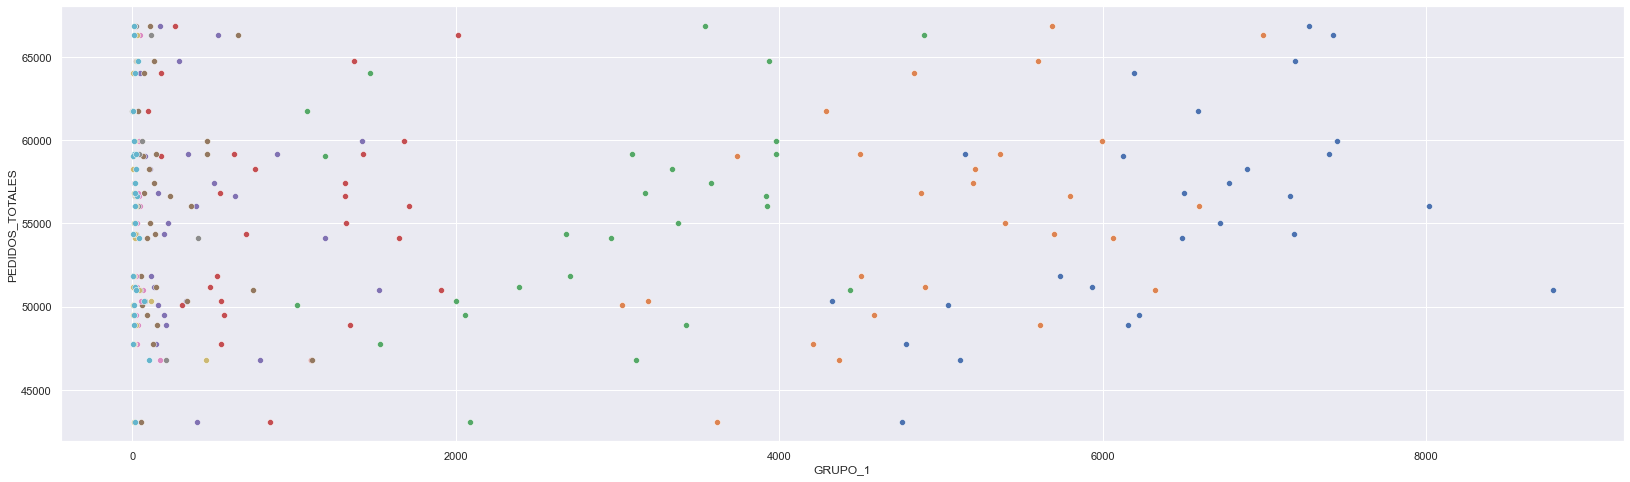

In [464]:
## Se graficaron los pedidos totales para los grupos del 1 al 10
for i in range(1,11):
    sns.scatterplot(data=df, x = f'GRUPO_{i}', y = 'PEDIDOS_TOTALES')

#### Correlación Pearson:

<AxesSubplot:>

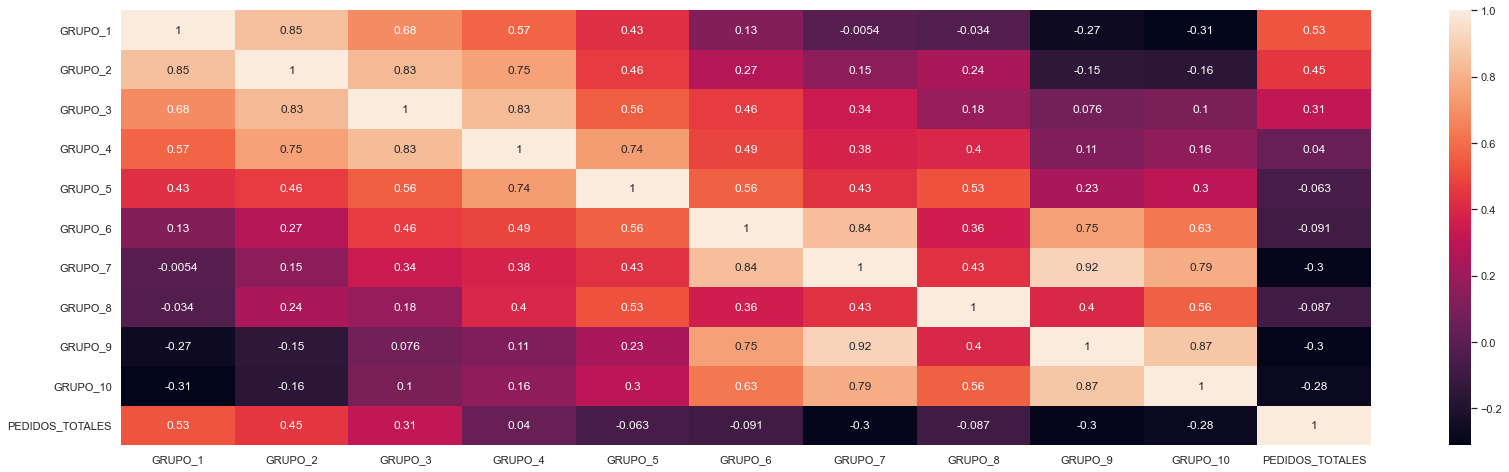

In [465]:
sns.heatmap(df.corr(method='pearson'), annot=True)

Solo se consideraron las variables con un coeficiente de corelacion mayor a 0.3 (corelacion moderada). Por ende, las Xn para el modelo1 se consideraron como:

- Grupo 1 (corr = 0.53)
- Grupo 2 (corr = 0.45)
- Grupo 3 (corr = 0.31)

<AxesSubplot:xlabel='CAMPAÑA', ylabel='PEDIDOS_TOTALES'>

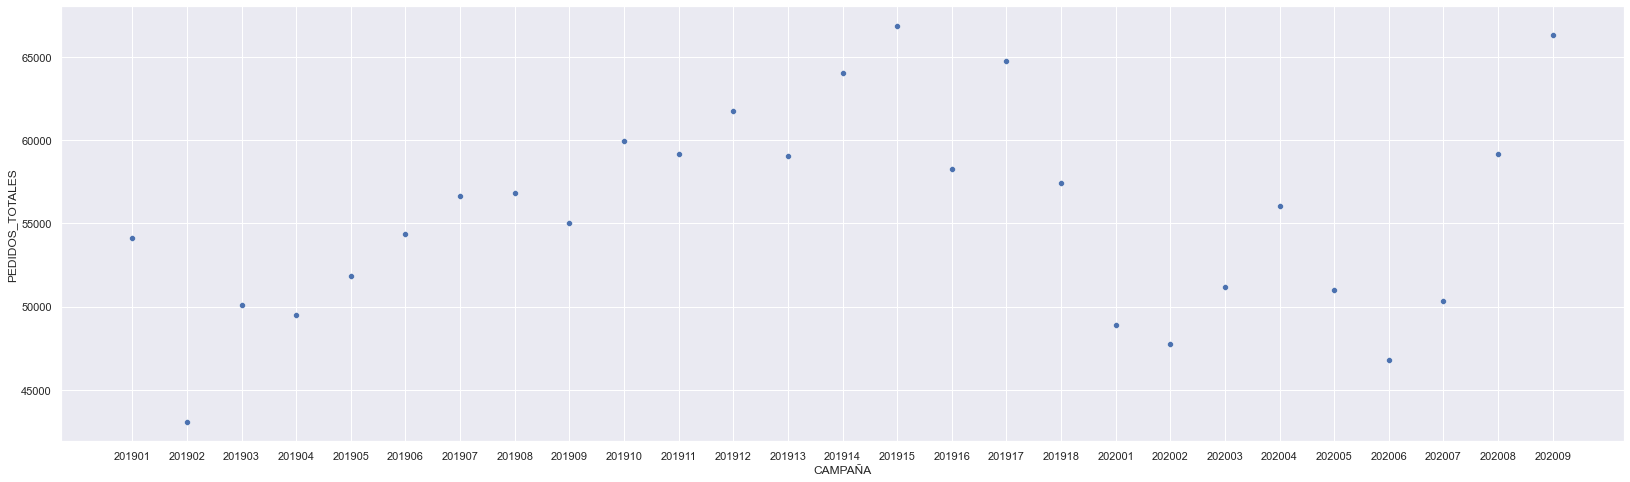

In [466]:
## Se analizó los pedidos totales en funcion a cada campaña 

sns.scatterplot(data=df, x='CAMPAÑA', y= 'PEDIDOS_TOTALES',palette='Set2' ) 

---

<AxesSubplot:xlabel='GRUPO_1', ylabel='PEDIDOS_TOTALES'>

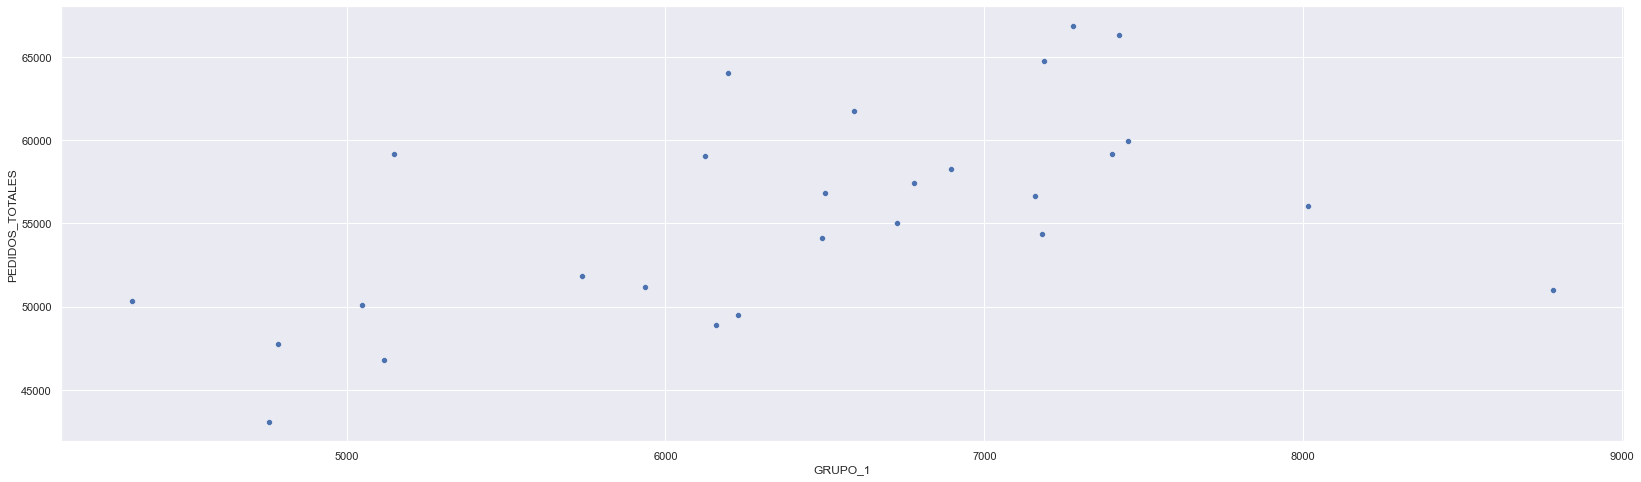

In [467]:
## Se analizaron los pedidos totales por grupo uno a uno para ver la distribucion de los datos 

sns.scatterplot(data=df, x='GRUPO_1', y= f'PEDIDOS_TOTALES',palette='Set2' ) #ok (corr = 0.53)

<AxesSubplot:xlabel='GRUPO_2', ylabel='PEDIDOS_TOTALES'>

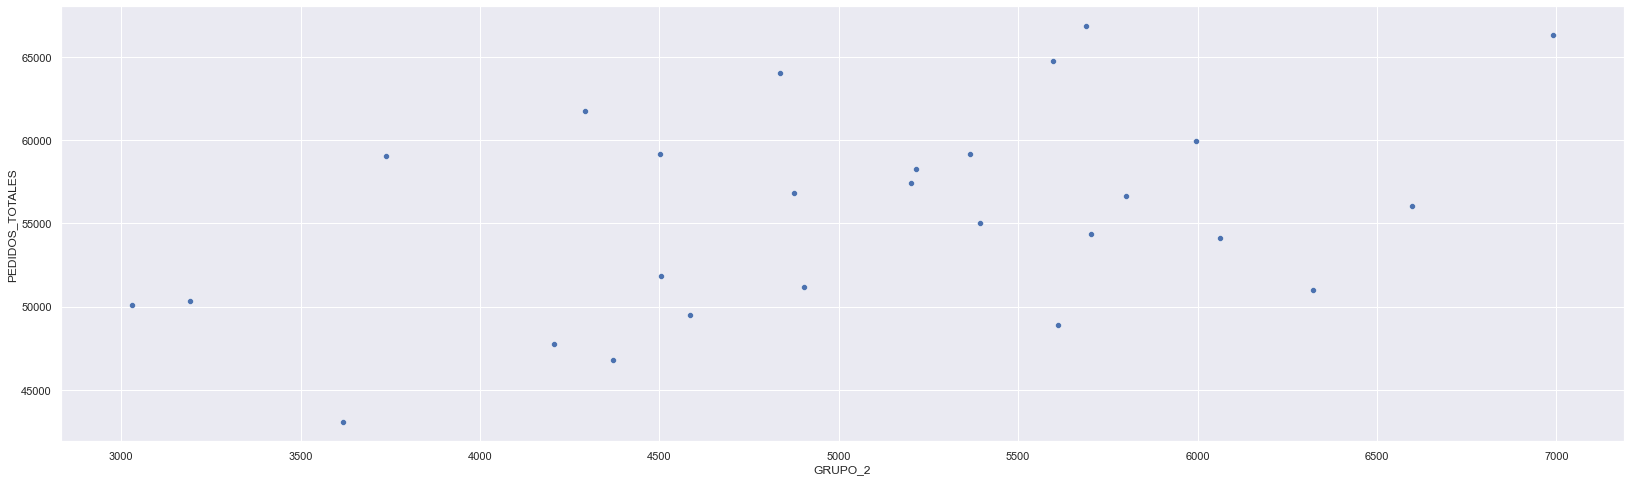

In [468]:
sns.scatterplot(data=df, x='GRUPO_2', y= f'PEDIDOS_TOTALES',palette='Set2' ) #ok (corr = 0.45)

<AxesSubplot:xlabel='GRUPO_3', ylabel='PEDIDOS_TOTALES'>

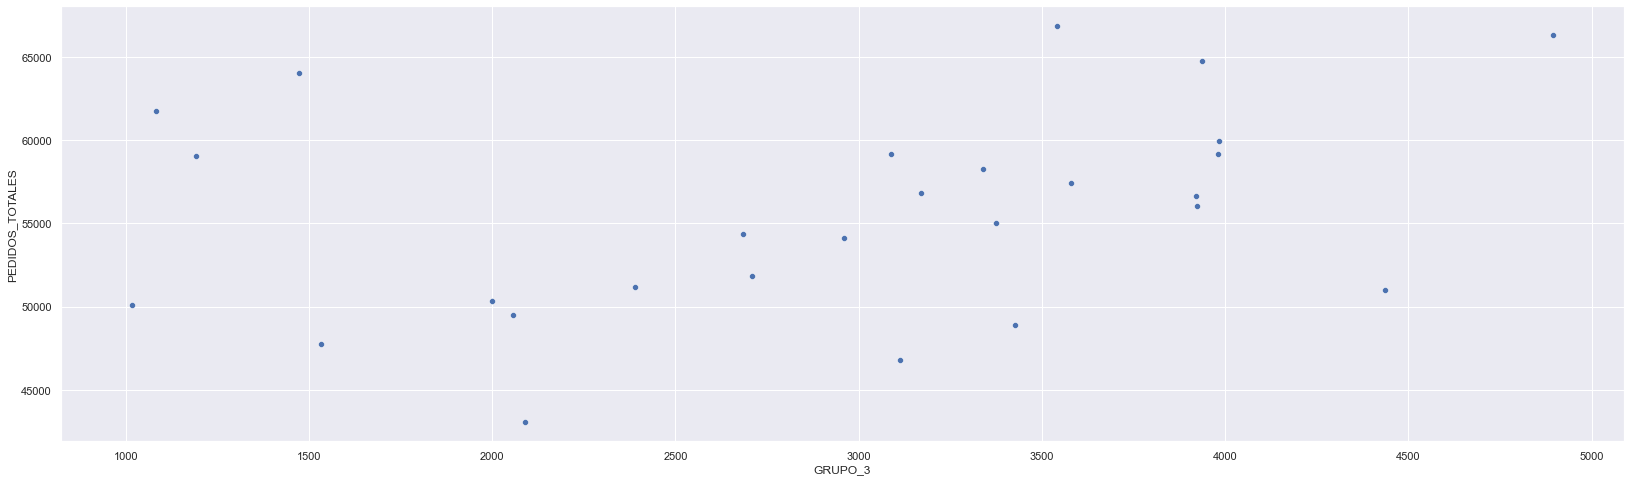

In [469]:
sns.scatterplot(data=df, x='GRUPO_3', y= f'PEDIDOS_TOTALES',palette='Set2' ) #ok

<AxesSubplot:xlabel='GRUPO_4', ylabel='PEDIDOS_TOTALES'>

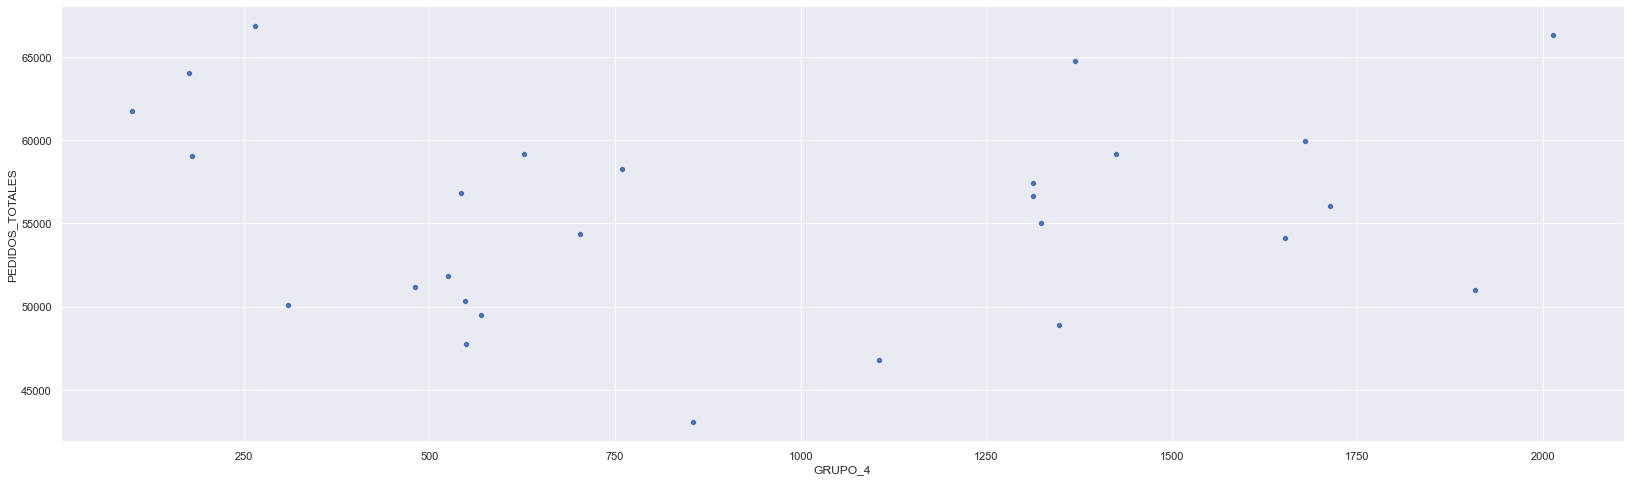

In [470]:
sns.scatterplot(data=df, x='GRUPO_4', y= f'PEDIDOS_TOTALES',palette='Set2' ) #no

<AxesSubplot:xlabel='GRUPO_5', ylabel='PEDIDOS_TOTALES'>

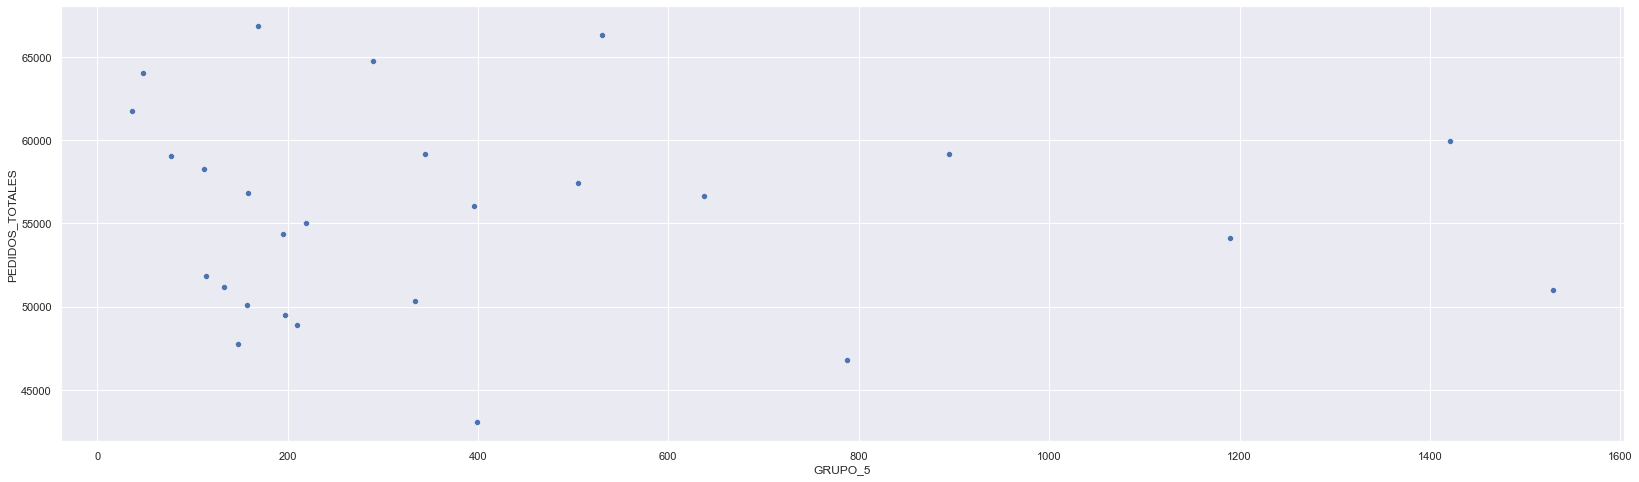

In [471]:
sns.scatterplot(data=df, x='GRUPO_5', y= f'PEDIDOS_TOTALES',palette='Set2' ) #no

<AxesSubplot:xlabel='GRUPO_6', ylabel='PEDIDOS_TOTALES'>

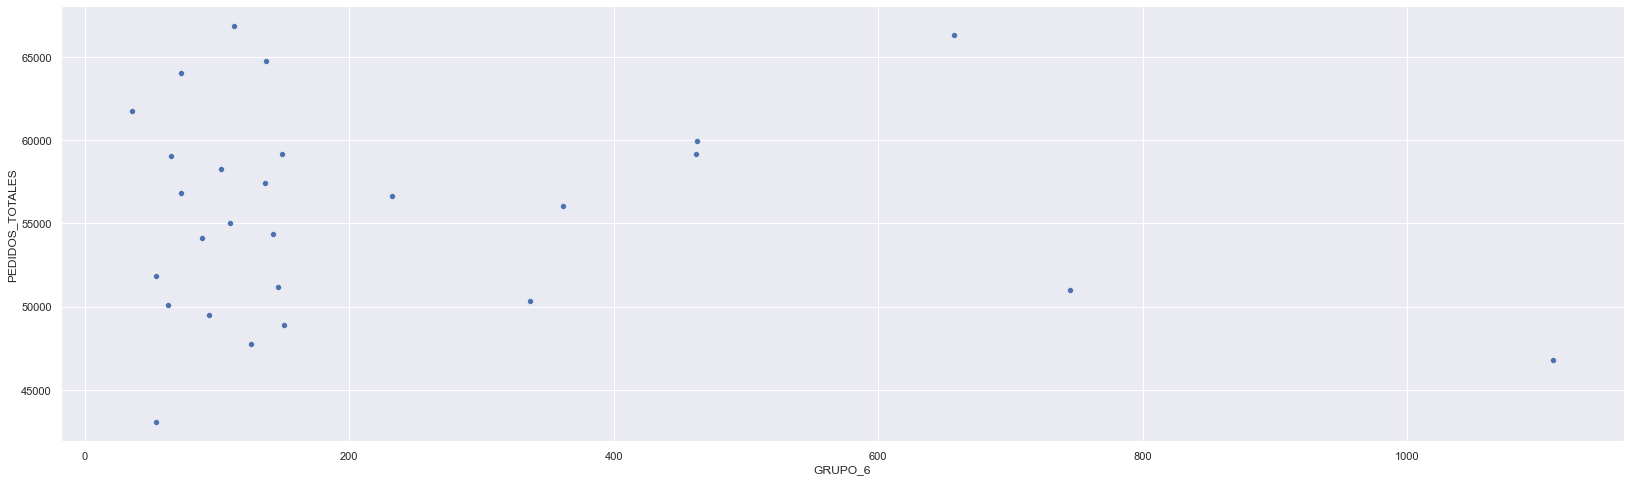

In [472]:
sns.scatterplot(data=df, x='GRUPO_6', y= f'PEDIDOS_TOTALES',palette='Set2' ) #no

<AxesSubplot:xlabel='GRUPO_7', ylabel='PEDIDOS_TOTALES'>

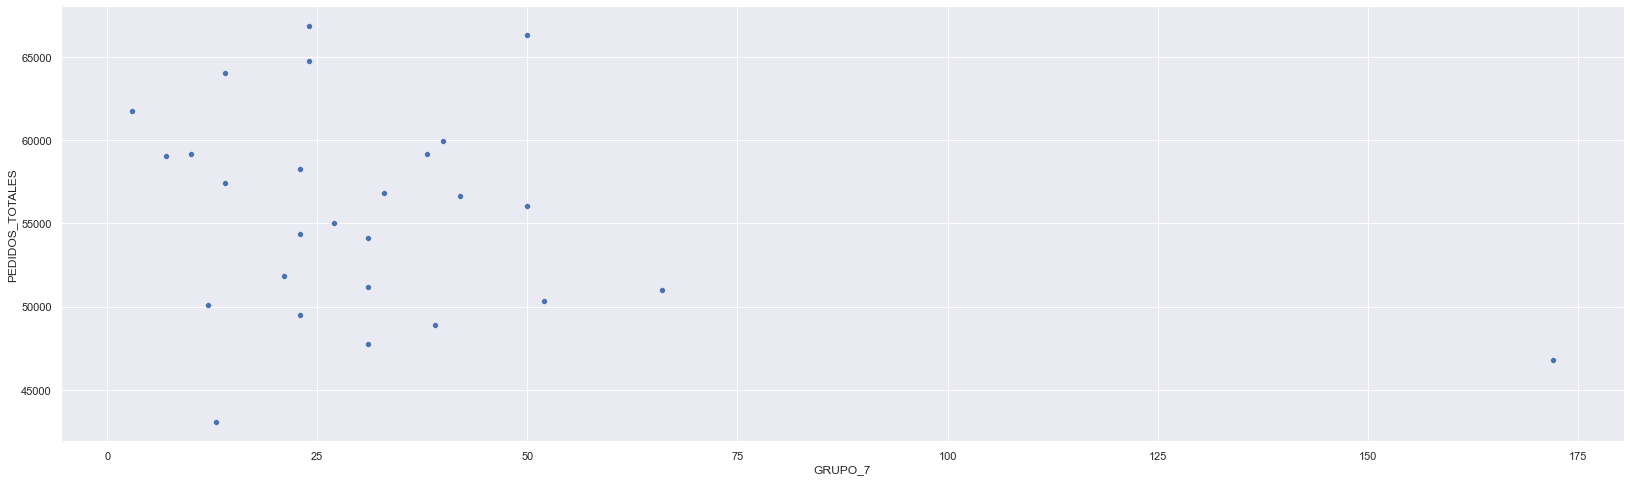

In [473]:
sns.scatterplot(data=df, x='GRUPO_7', y= f'PEDIDOS_TOTALES',palette='Set2' ) #ok // corr = 0.31

<AxesSubplot:xlabel='GRUPO_8', ylabel='PEDIDOS_TOTALES'>

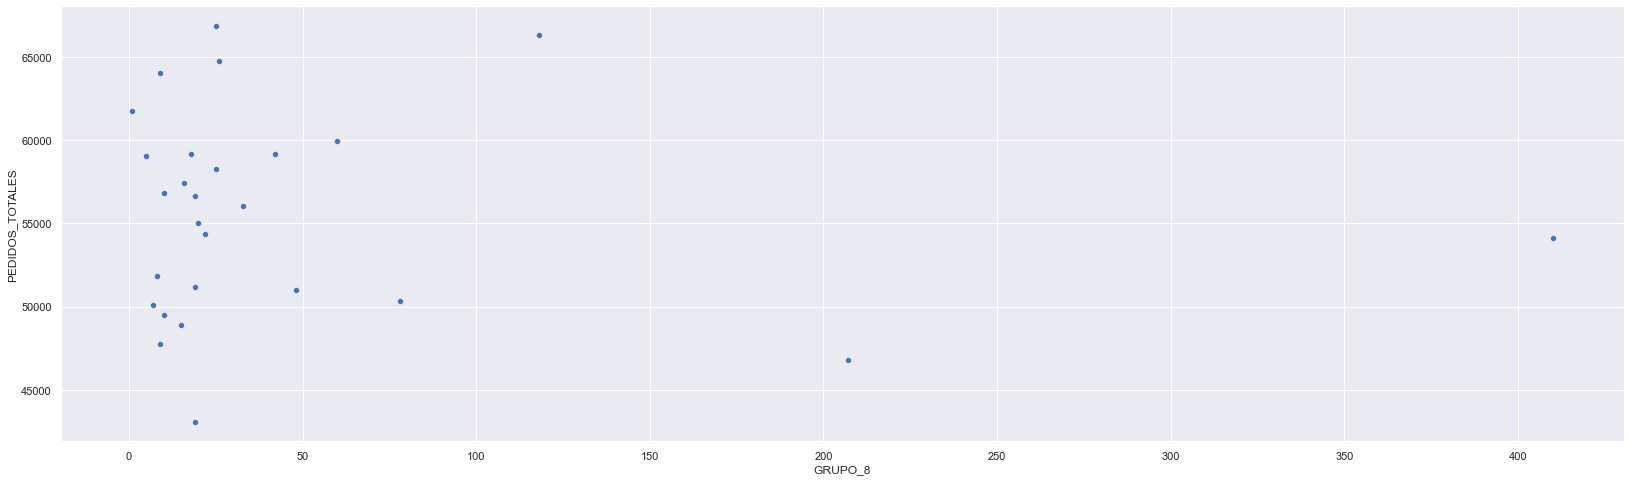

In [474]:
sns.scatterplot(data=df, x='GRUPO_8', y= f'PEDIDOS_TOTALES',palette='Set2' ) #no

<AxesSubplot:xlabel='GRUPO_9', ylabel='PEDIDOS_TOTALES'>

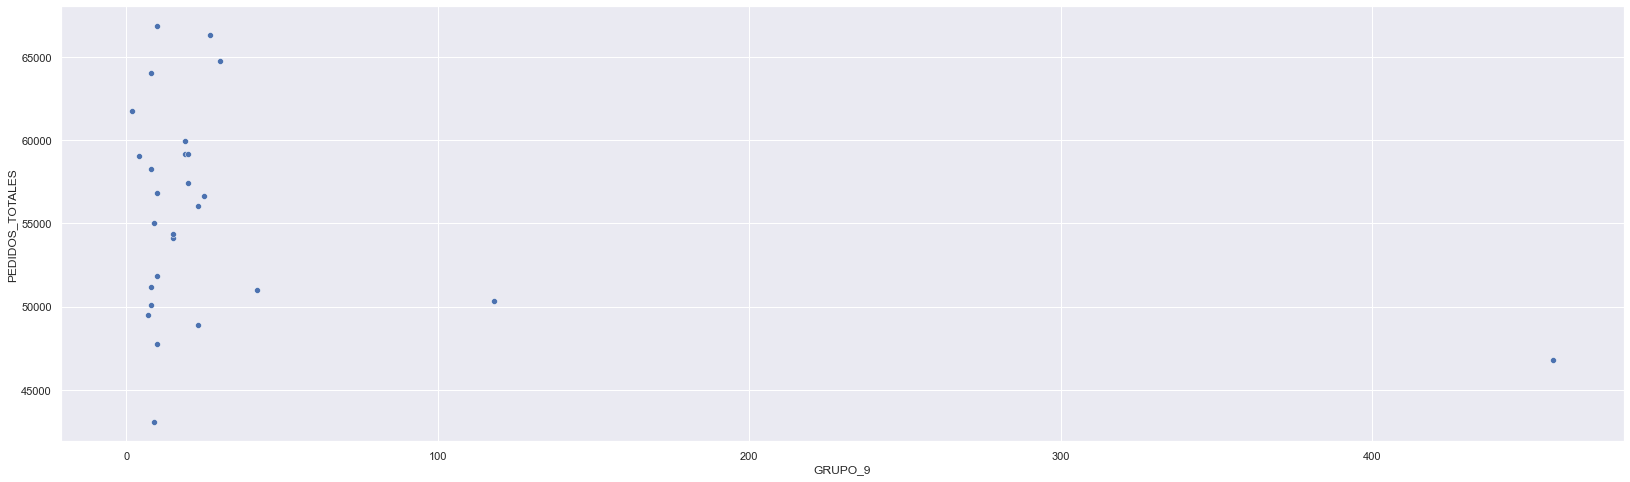

In [475]:
sns.scatterplot(data=df, x='GRUPO_9', y= f'PEDIDOS_TOTALES',palette='Set2' ) #no

<AxesSubplot:xlabel='GRUPO_10', ylabel='PEDIDOS_TOTALES'>

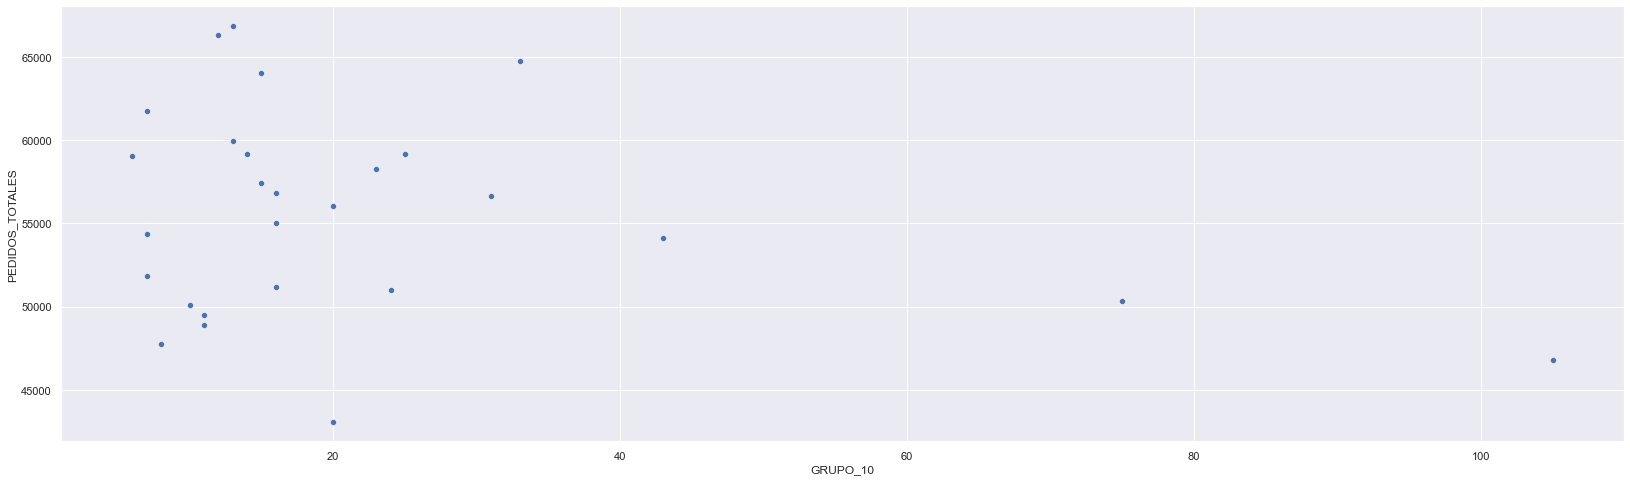

In [476]:
sns.scatterplot(data=df, x='GRUPO_10', y= f'PEDIDOS_TOTALES',palette='Set2' ) #no // corr = 0.28

---

## Modelamiento de los datos


### Modelo 1:

Y = Pedidos totales

Xn = Grupo1 , Grupo2, Grupo3 

Outcome: predecir los pedidos totales, en función a los pedidos de cada grupo n. 

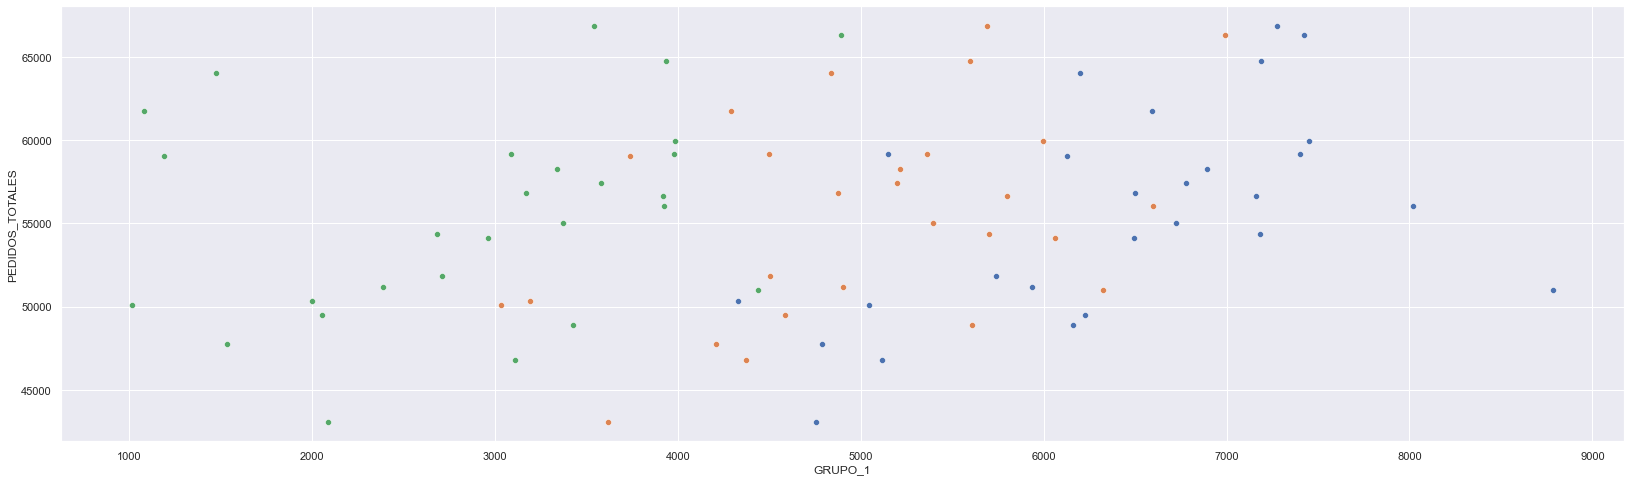

In [477]:
for i in range(1,4):
    sns.scatterplot(data=df, x = f'GRUPO_{i}', y = 'PEDIDOS_TOTALES')

In [478]:
## Se aplica un Modelo de Regresion Lineal para hallar los coeficientes de la ecuacion
X = df.iloc[:,1:4]
X
y =np.array(df['PEDIDOS_TOTALES'])
X_train, X_test, y_train,y_test = train_test_split(X,y)

lin = LinearRegression()
lin.fit(X_train,y_train)
y_pred = lin.predict(X_test)
coef = lin.coef_
print(coef)

[ 6.47279323 -3.27767532  0.78699936]


In [479]:
## Ecuacion de la recta ## y = mx1x1 + ... m10x10 + b 

ecuacion = pd.DataFrame((zip)(X.columns,coef), columns =['grupo','coeficiente m'])
ecuacion = ecuacion.append({'grupo':'intercepto b','coeficiente m':lin.intercept_},ignore_index=True)
print(ecuacion)

ecuacion.to_csv('coeficientes.csv')

          grupo  coeficiente m
0       GRUPO_1       6.472793
1       GRUPO_2      -3.277675
2       GRUPO_3       0.786999
3  intercepto b   28243.896121


In [ ]:
for i in range(1,4):
    sns.scatterplot(data=df, x = f'GRUPO_{i}', y = 'PEDIDOS_TOTALES')
    
x_value = [x for x in range(0,9000)]
y_value = [lin.intercept_ + x * coef[0] + coef[1] * 2 *x + coef[2] * 3 *x for x in x_value]
sns.lineplot(x_value,y_value)
plt.xlabel('Pedidos por grupo')
plt.ylabel('Pedidos totales')
plt.title('Ajuste de regresion lineal')

In [480]:
g1 = int(input("Ingrese las ventas del Grupo 1: "))
g2 = int(input("Ingrese las ventas del Grupo 2: "))
g3 = int(input("Ingrese las ventas del Grupo 3: "))

ecuacion = coef[0]*g1 + coef[1]*g2 + coef[2]*g3 + lin.intercept_
print(ecuacion)

28251.860355541125


### Promedio Móvil:

Y = Pedidos totales

t = Campaña (201901 - 202009)


Outcome: predecir las ventas futuras en funcion a las ventas de campañas pasadas. 

<AxesSubplot:xlabel='CAMPAÑA', ylabel='PEDIDOS_TOTALES'>

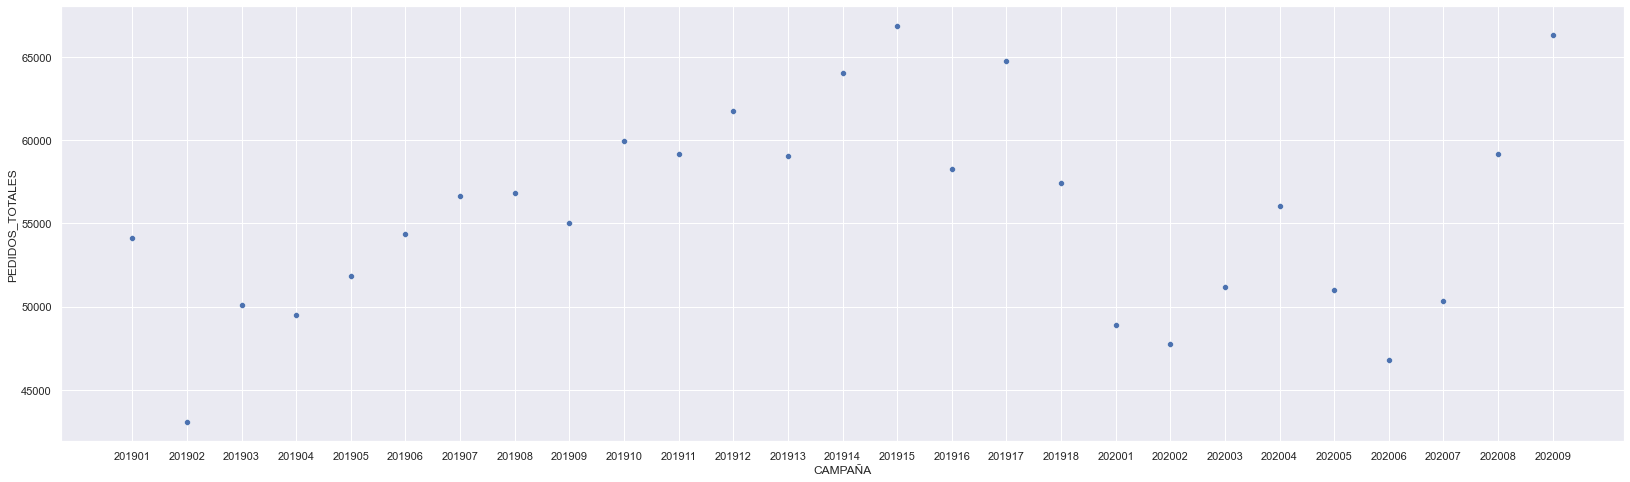

In [481]:
sns.scatterplot(data=df, x='CAMPAÑA', y= 'PEDIDOS_TOTALES',palette='Set2' ) 

<AxesSubplot:>

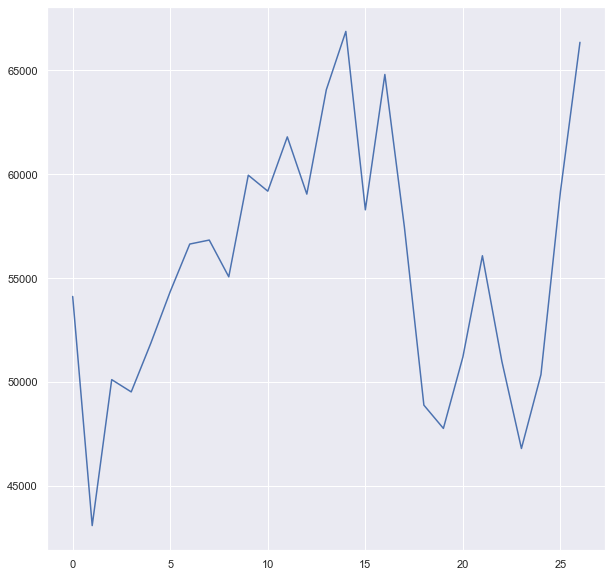

In [482]:
df["PEDIDOS_TOTALES"].plot(figsize =(10,10))

In [483]:
# años = []
# dias = [] ## tomamos el numero de campaña como dia del mes. 

# for i in df["CAMPAÑA"]:
#     años.append((i[0:4]))
#     dias.append(i[4:6])

# print("AÑOS ... ", años)
# print("\n")
# print("DIAS ... " , dias)

In [484]:
# años = pd.DataFrame(años) + "01" ## para propositos del analisis se asume que todas las campañas se realizaron en distintos dias de enero 
# dias = pd.DataFrame(dias)
# años[0]

In [485]:
# df["FECHA"] = años[0].str.cat(dias[0].astype(str))

In [ ]:
df.rename({"CAMPAÑA" : "FECHA"}, axis=1,inplace=True)
df

In [493]:
##df["FECHA"] = pd.to_datetime(df["FECHA"])
df = df.set_index("FECHA")
df

,GRUPO_1,GRUPO_2,GRUPO_3,GRUPO_4,GRUPO_5,GRUPO_6,GRUPO_7,GRUPO_8,GRUPO_9,GRUPO_10,PEDIDOS_TOTALES
FECHA,,,,,,,,,,,
201901,6492,6062,2961,1652,1190,89,31,410,15,43,54113
201902,4757,3618,2089,855,399,54,13,19,9,20,43091
201903,5047,3031,1018,309,157,63,12,7,8,10,50112
201904,6227,4586,2056,569,197,94,23,10,7,11,49522
201905,5738,4504,2710,525,114,54,21,8,10,7,51854
201906,7182,5702,2684,703,195,142,23,22,15,7,54349
201907,7159,5800,3921,1313,637,232,42,19,25,31,56634
201908,6502,4876,3169,542,159,73,33,10,10,16,56826
201909,6725,5394,3375,1324,219,110,27,20,9,16,55058


<AxesSubplot:xlabel='FECHA'>

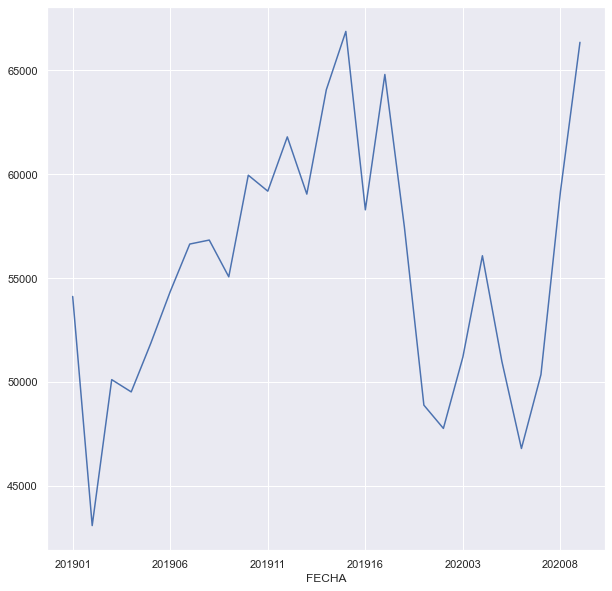

In [494]:
df["PEDIDOS_TOTALES"].plot(figsize =(10,10))

<AxesSubplot:xlabel='FECHA'>

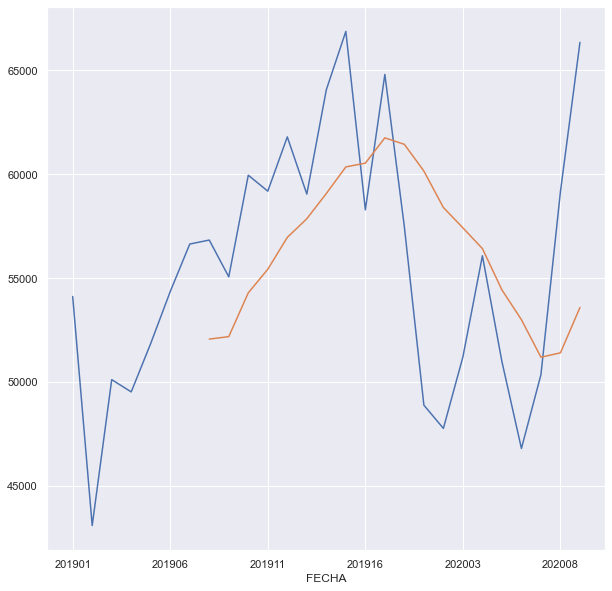

In [495]:
df["PEDIDOS_TOTALES"].plot(figsize =(10,10))
df['PEDIDOS_TOTALES'].rolling(window=8).mean().plot()

In [ ]:
df['PROMEDIO_MOVIL'] = df['PEDIDOS_TOTALES'].rolling(window=8).mean()

In [ ]:
df

### Suavizacion Exponencial

In [ ]:
df.plot()

In [555]:
test = df.iloc[:,[10]]
test

,PEDIDOS_TOTALES
FECHA,
201901,54113
201902,43091
201903,50112
201904,49522
201905,51854
201906,54349
201907,56634
201908,56826
201909,55058


In [ ]:
train = df.iloc[14:,[10]]
train

<AxesSubplot:xlabel='FECHA'>

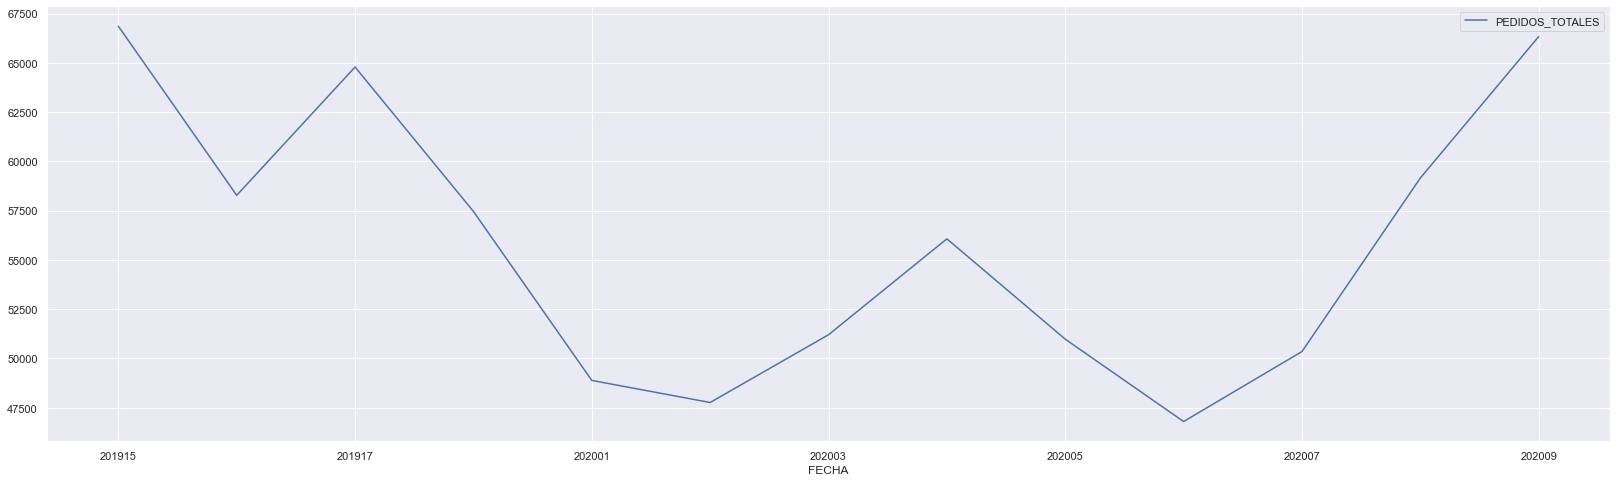

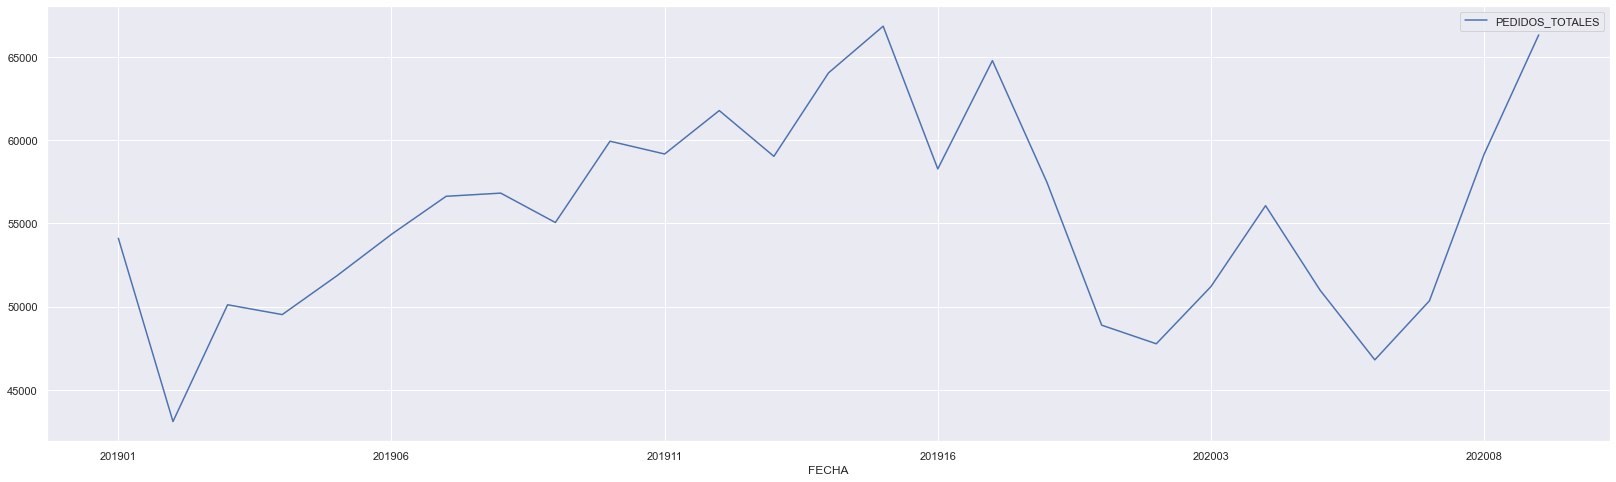

In [557]:
train.plot()
test.plot()

In [532]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
model1 = ExponentialSmoothing(train['PEDIDOS_TOTALES'],trend = 'add', seasonal = 'add', seasonal_periods = 2).fit()

In [558]:
model2 = ExponentialSmoothing(train['PEDIDOS_TOTALES'],trend = 'mul', seasonal = 'mul', seasonal_periods = 2).fit()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:590: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:390: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


<AxesSubplot:xlabel='FECHA'>

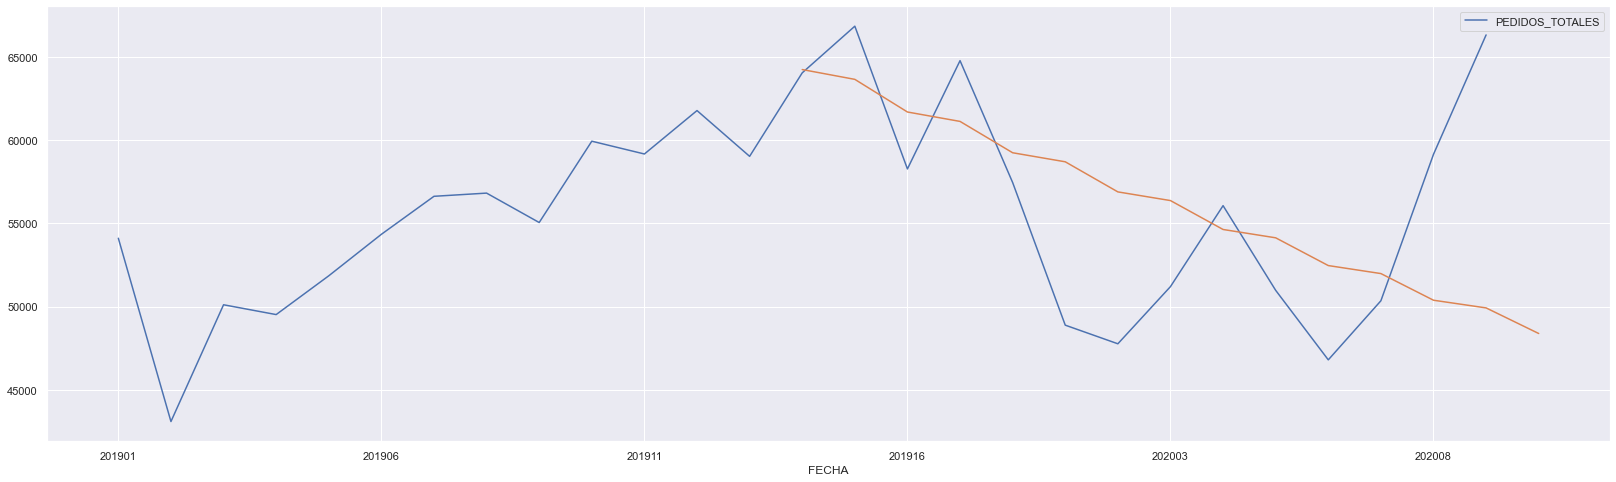

In [562]:
test.plot()
model1.forecast(15).plot()
model2.forecast(15).plot()